In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

pd.set_option('max_colwidth',10000)

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
import dill

In [4]:
content = pd.read_csv('data/content.csv')

In [7]:
content.drop('Unnamed: 0', axis =1, inplace=True)

In [11]:
content

,0
0,spy claims cloud horizon airshow min readshanghai frictions accusations industrial espionage set cast cloud largest aerospace meeting week suppliers consider country slowing economy mean booming jet demand biennial airshow held coastal city zhuhai nov traditionally event parade growing aviation prowess front aerospace executives diplomats arms buyers countries analysts say expecting many headline announcements big deals bruising slowing economy cause companies cautious tarmac filled planes likes airbus sa air pa embraer sa main symbol commercial aviation ambitions commercial aircraft corp comac cmafc ul narrowbody jet senior executive said undergoing test flights boeing co ba n opening completion plant display planes models exhibition stand expecting big turnout said aviation expert li xiaojin know economy great companies would normally send people send five instead become key hunting ground foreign firms deals airlines expanded fleets keep surging travel demand putting country position overtake world top aviation market next decade economic growth weakened slowest pace since financial crisis relations countries tested ambitions grow domestic champions industries aviation made aircraft far escaped analysts said still waiting see would spell companies boeing honeywell hon n gulfstream face fierce competition likes airbus suppliers exported billion civilian aircraft biggest category goods exported according paper published federal reserve bank st louis unlikely might strategically steer future aircraft purchases airbus rather boeing said marc szepan aviation expert university oxford former industry executive addition might evaluation relative attractiveness industrial partners future aircraft programs might favor european component structures suppliers far avoided showing hand either direction deals leasing firms buy foreign aircraft either pushed back kept private recent allegations court filings intelligence attempted steal information french turbofan engine developed commercial jetliners clear reference safran general electric leap saf pa ge n fray relations analysts said also criticized decision send senior officials shanghai import expo takes place week airshow counts one important foreign policy events right political winds quite concerning said aerospace analyst richard aboulafia teal group said friday likely make deal adding lot progress made resolve two countries differences warning still may impose goods expected put show strength space defense self developed fighter training ftc aircraft historically high number weapons well latest unmanned aerial vehicles among kit display air force said friday number chengdu j stealth fighters would perform demo flights debuted show two years ago second flypast kelvin wong senior asia pacific defense technology expert ihs markit said would part deliberate messaging often associated closely watched show appears pla people liberation army definitely showcasing growing confidence latest j combat aircraft said wong reporting brenda goh stella qiu additional reporting tim hepher hong kong writing brenda goh editing muralikumar anantharamanall quotes delayed minimum minutes see complete list exchanges delays rights reserved
1,airbus ceo says winner min readzhuhai world two largest planemakers signaled tuesday keen see end bruising opened largest airshow display showcased aviation ambitions boeing ba n airbus air pa made comments opening day biennial airshow held coastal city zhuhai nov traditionally event parade growing aviation prowess become key hunting ground deals foreign aviation firms thanks surging travel demand outlook complicated desire grow champions industries ranging aviation semiconductors robots ties particular strained criticizes sees intellectual property theft entry barriers business gaping deficit calls complaints unreasonable two sides resorted tit tat goods worth billions dollars made aircraft among america biggest exports far escaped analysts said still waiting s

In [13]:
df_sentiment = pd.DataFrame(columns = ['polarity', 'subjectivity'])

for i in range(len(content)):
    df_sentiment.loc[i,'polarity'] = TextBlob(content.iloc[i,0]).sentiment.polarity
    df_sentiment.loc[i,'subjectivity'] = TextBlob(content.iloc[i,0]).sentiment.subjectivity
    
df_sentiment = df_sentiment.astype(float)

In [15]:
df_sentiment.head()

,polarity,subjectivity
0,0.074998,0.373739
1,0.104214,0.391857
2,0.109005,0.416962
3,0.124369,0.433062
4,0.053152,0.232551


In [16]:
doc_topic_prob = pd.read_csv('data/doc_topic_prob.csv')

In [18]:
import re

In [37]:
drop_col = list(filter(lambda x: re.search('Unnamed:*', x), doc_topic_prob.columns))

In [39]:
doc_topic_prob.drop(drop_col, axis = 1, inplace = True)

In [41]:
# Labels each article's as its dominant topic, which has a normalized probability greater than 0.1 and any other topic's probability
df_sentiment['topic'] = ''
for i in range(doc_topic_prob.shape[0]):
    topic = ''
    dominant = doc_topic_prob.loc[i].nlargest(1)
    if dominant.values >= 0.1:
        df_sentiment.loc[i,'topic'] = dominant.index.format()[0]
    else:
        df_sentiment.loc[i,'topic'] = 'others'

In [42]:
df_sentiment.shape

(5891, 3)

In [43]:
df_sentiment.head()

,polarity,subjectivity,topic
0,0.074998,0.373739,others
1,0.104214,0.391857,others
2,0.109005,0.416962,others
3,0.124369,0.433062,investment
4,0.053152,0.232551,investment


In [44]:
df_neg = df_sentiment[df_sentiment.polarity < 0]
df_neg_percent = df_neg.topic.value_counts()/df_sentiment.topic.value_counts()
df_neg_percent.sort_values(ascending=False,inplace=True)

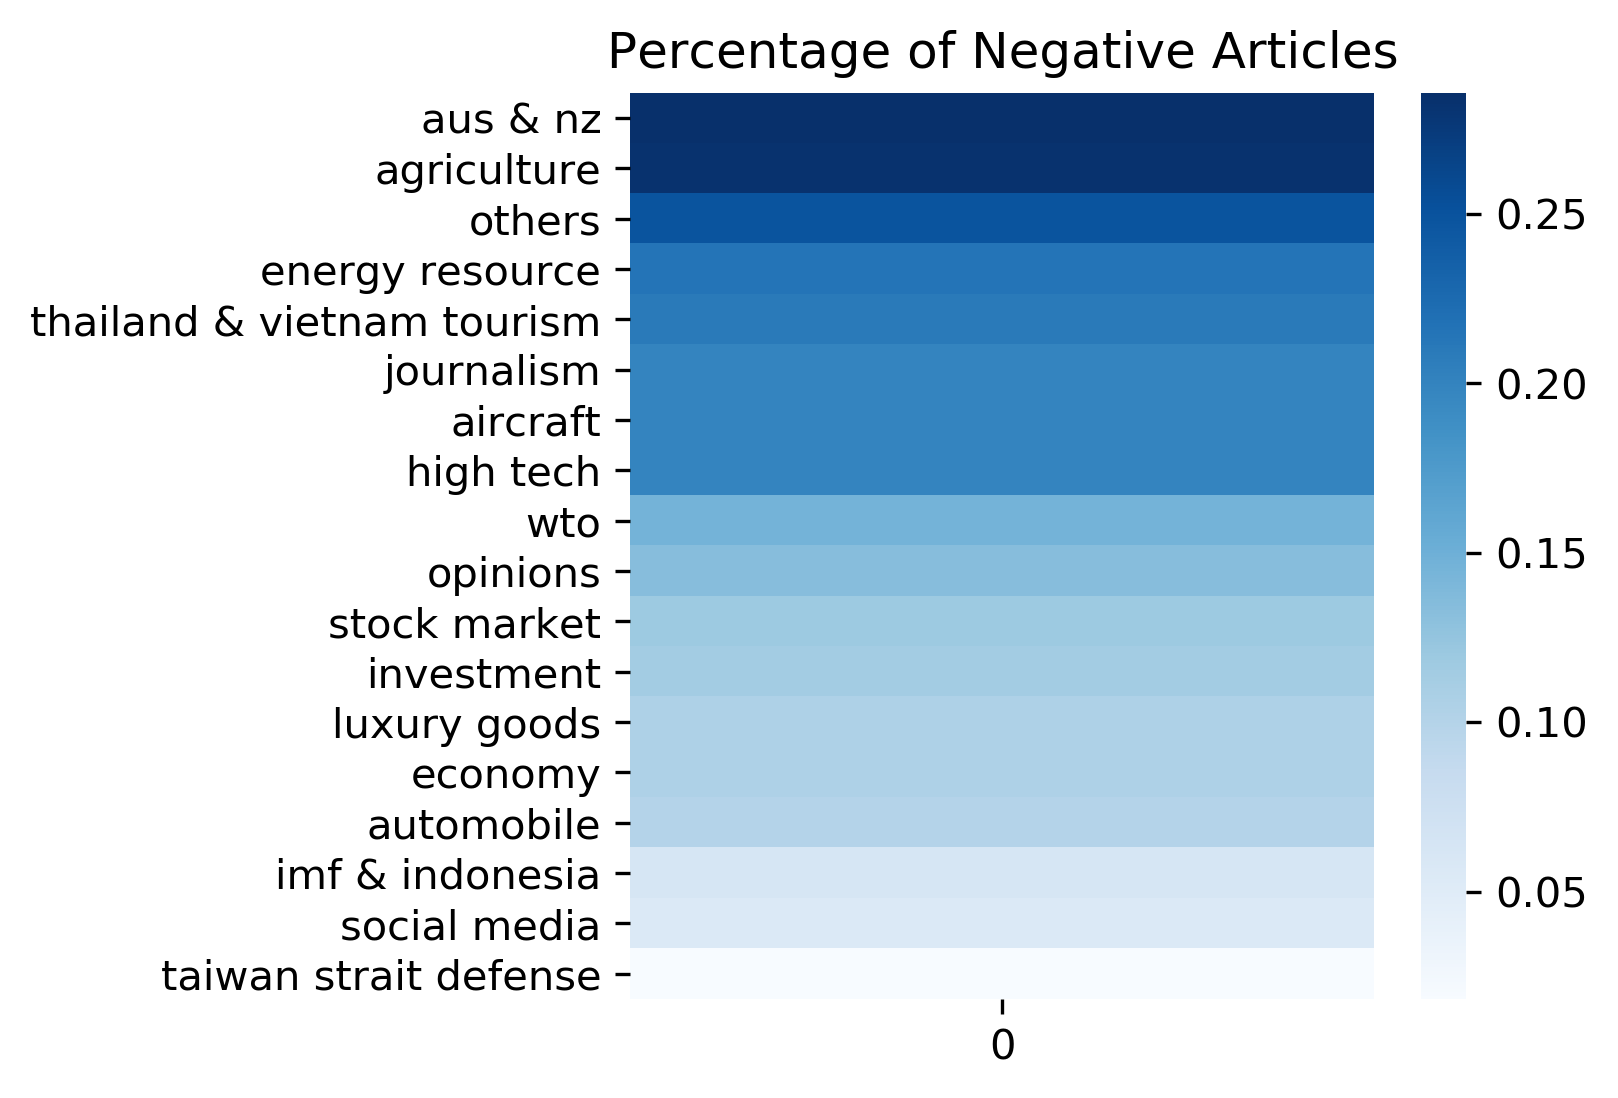

In [50]:
plt.figure(figsize=(4,4),dpi=300)
plt.title('Percentage of Negative Articles')
sns.heatmap(df_neg_percent[:, np.newaxis],yticklabels=df_neg_percent.index,cmap='Blues');

In [51]:
df_sentiment.polarity.quantile([0.15,0.5,0.85])

0.15    0.000000
0.50    0.058679
0.85    0.126105
Name: polarity, dtype: float64

In [52]:
df_sentiment['polarity_adj'] = 0
neg = df_sentiment.polarity <= 0
df_sentiment.loc[neg,'polarity_adj'] = -1
pos = df_sentiment.polarity >= 0.126
df_sentiment.loc[pos,'polarity_adj'] = 1

In [62]:
df_effect = df_sentiment.groupby('topic')['polarity_adj'].mean().sort_values()

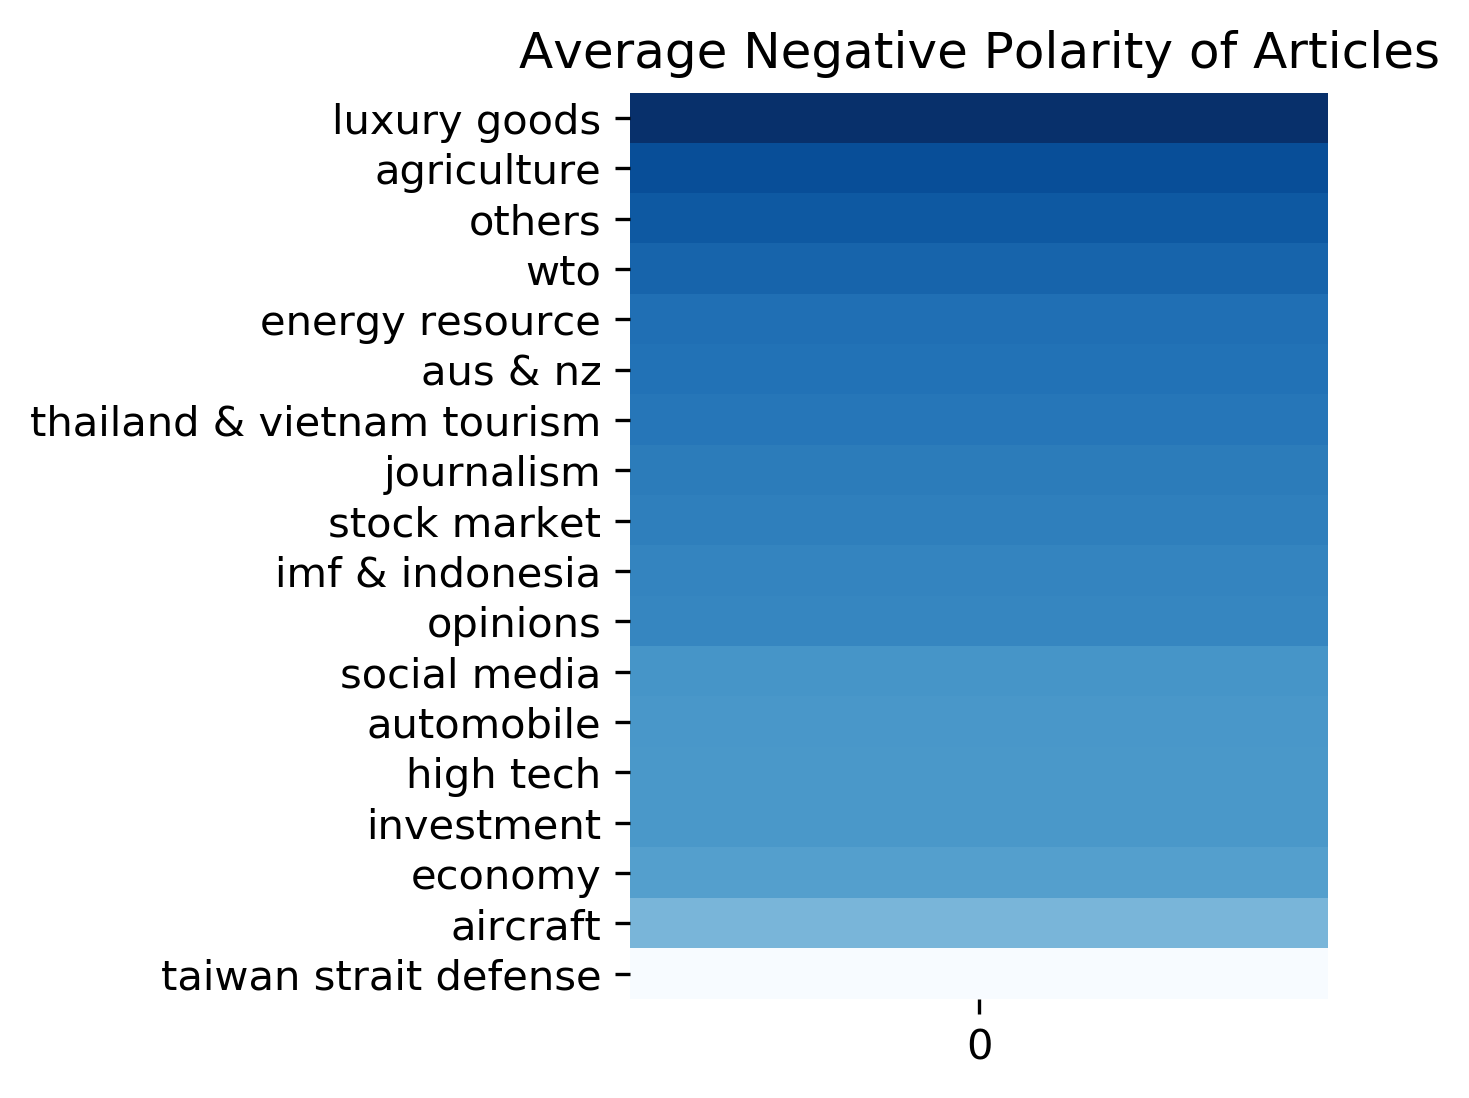

In [64]:
plt.figure(figsize=(3,4), dpi=300)
plt.title('Average Negative Polarity of Articles')
sns.heatmap(df_effect[:, np.newaxis],yticklabels=df_effect.index,cmap='Blues_r',cbar=False);

In [69]:
df = pd.read_csv('data/article_info_cleaned.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [70]:
df_metadata = pd.concat([df,df_sentiment],axis=1)
df_metadata.drop(columns=['content','polarity','subjectivity'],axis=1,inplace=True)
df_metadata.rename(columns={'polarity_adj':'sentiment'},inplace=True)
df_metadata.head()

,description,source,title,url,publish_date,topic,sentiment
0,"Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026,2018-11-04,others,0
1,"Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP,2018-11-06,others,0
2,"Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit.",Reuters,"Asian shares sink as risk sentiment sours, pound hits 2-week top",https://www.reuters.com/article/us-global-markets/asian-shares-sink-as-risk-sentiment-sours-pound-hits-2-week-top-idUSKCN1N90PQ,2018-11-05,others,0
3,The biggest macro theme remains the trade war after recent warnings from major names including the IMF’s Christine Lagarde and former U.S. Treasury Secretary Hank Paulson. Coming UpThe Fed’s next rate decision is Thursday.,Yahoo.com,Stocks Climb as Investors Cheer On U.S. Gridlock: Markets Wrap,https://www.yahoo.com/news/asia-stocks-start-mixed-u-220816159.html,2018-11-07,investment,0
4,"Trade war fears, ongoing Brexit negotiations, and the crisis surrounding Italy’s budget are all dragging on the German economy. Traditionally strong exports have disappointed in four of last six months. New rules on emissions for automakers aren't helping. Eu…",Business Insider,Germany's economy is getting hammered by the rest of the world's problems,https://www.businessinsider.com/germanys-economy-is-getting-hit-by-the-rest-of-the-worlds-problems-2018-11,2018-11-08,investment,0


In [71]:
df_metadata.to_csv('data/metadata.csv')